In [1]:
library(ROCR)
library(dplyr)

Warning message:
"package 'ROCR' was built under R version 3.6.3"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
survey <- read.csv('전처리/survey.csv')

In [3]:
str(survey)
head(survey)

'data.frame':	213 obs. of  13 variables:
 $ X          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex        : Factor w/ 2 levels "Female","Male": 2 1 1 1 2 1 2 1 1 1 ...
 $ age_class  : int  20 20 20 20 20 20 20 20 30 30 ...
 $ definition : Factor w/ 2 levels "bright","harmony": 2 1 1 1 2 1 1 1 2 2 ...
 $ need       : Factor w/ 2 levels "bright","harmony": 2 2 1 1 2 1 2 1 2 1 ...
 $ purpose    : Factor w/ 3 levels "clothes","cosmetic",..: 1 1 1 1 1 1 1 2 1 1 ...
 $ interest   : int  5 5 3 3 5 5 3 3 4 3 ...
 $ comp       : int  4 1 2 3 5 5 5 2 3 3 ...
 $ triangle1  : int  5 1 4 4 5 5 5 4 2 5 ...
 $ triangle2  : int  2 2 1 3 4 4 2 3 2 3 ...
 $ doubleness1: int  3 2 2 2 1 2 5 4 5 2 ...
 $ doubleness2: int  2 3 1 2 2 2 4 3 4 3 ...
 $ doubleness3: int  2 2 2 1 3 1 5 1 5 5 ...


X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
0,Male,20,harmony,harmony,clothes,5,4,5,2,3,2,2
1,Female,20,bright,harmony,clothes,5,1,1,2,2,3,2
2,Female,20,bright,bright,clothes,3,2,4,1,2,1,2
3,Female,20,bright,bright,clothes,3,3,4,3,2,2,1
4,Male,20,harmony,harmony,clothes,5,5,5,4,1,2,3
5,Female,20,bright,bright,clothes,5,5,5,4,2,2,1


In [4]:
survey = filter(survey, sex=='Female')

In [5]:
str(survey)

'data.frame':	151 obs. of  13 variables:
 $ X          : int  1 2 3 5 7 8 9 10 11 12 ...
 $ sex        : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 1 1 1 ...
 $ age_class  : int  20 20 20 20 20 30 30 20 30 20 ...
 $ definition : Factor w/ 2 levels "bright","harmony": 1 1 1 1 1 2 2 1 2 2 ...
 $ need       : Factor w/ 2 levels "bright","harmony": 2 1 1 1 1 2 1 1 1 2 ...
 $ purpose    : Factor w/ 3 levels "clothes","cosmetic",..: 1 1 1 1 2 1 1 2 3 1 ...
 $ interest   : int  5 3 3 5 3 4 3 3 5 1 ...
 $ comp       : int  1 2 3 5 2 3 3 2 2 5 ...
 $ triangle1  : int  1 4 4 5 4 2 5 5 5 4 ...
 $ triangle2  : int  2 1 3 4 3 2 3 3 1 2 ...
 $ doubleness1: int  2 2 2 2 4 5 2 1 5 1 ...
 $ doubleness2: int  3 1 2 2 3 4 3 5 2 4 ...
 $ doubleness3: int  2 2 1 1 1 5 5 3 1 2 ...


In [6]:
survey

X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
1,Female,20,bright,harmony,clothes,5,1,1,2,2,3,2
2,Female,20,bright,bright,clothes,3,2,4,1,2,1,2
3,Female,20,bright,bright,clothes,3,3,4,3,2,2,1
5,Female,20,bright,bright,clothes,5,5,5,4,2,2,1
7,Female,20,bright,bright,cosmetic,3,2,4,3,4,3,1
8,Female,30,harmony,harmony,clothes,4,3,2,2,5,4,5
9,Female,30,harmony,bright,clothes,3,3,5,3,2,3,5
10,Female,20,bright,bright,cosmetic,3,2,5,3,1,5,3
11,Female,30,harmony,bright,etc,5,2,5,1,5,2,1
12,Female,20,harmony,harmony,clothes,1,5,4,2,1,4,2


In [7]:
survey$comp1 <- case_when(
    survey$comp == 1 ~ 1,
    survey$comp != 1 ~ 0)

survey$comp2 <- case_when(
    survey$comp == 2 ~ 1,
    survey$comp != 2 ~ 0)

survey$comp3 <- case_when(
    survey$comp == 3 ~ 1,
    survey$comp != 3 ~ 0)

survey$comp4 <- case_when(
    survey$comp == 4 ~ 1,
    survey$comp != 4 ~ 0)

survey$comp5 <- case_when(
    survey$comp == 5 ~ 1,
    survey$comp != 5 ~ 0)

survey$t1_1 <- case_when(
    survey$triangle1 == 1 ~ 1,
    survey$triangle1 != 1 ~ 0)

survey$t1_2 <- case_when(
    survey$triangle1 == 2 ~ 1,
    survey$triangle1 != 2 ~ 0)

survey$t1_3 <- case_when(
    survey$triangle1 == 3 ~ 1,
    survey$triangle1 != 3 ~ 0)

survey$t1_4 <- case_when(
    survey$triangle1 == 4 ~ 1,
    survey$triangle1 != 4 ~ 0)

survey$t1_5 <- case_when(
    survey$triangle1 == 5 ~ 1,
    survey$triangle1 != 5 ~ 0)
	
survey$t2_1 <- case_when(
    survey$triangle2 == 1 ~ 1,
    survey$triangle2 != 1 ~ 0)

survey$t2_2 <- case_when(
    survey$triangle2 == 2 ~ 1,
    survey$triangle2 != 2 ~ 0)

survey$t2_3 <- case_when(
    survey$triangle2 == 3 ~ 1,
    survey$triangle2 != 3 ~ 0)

survey$t2_4 <- case_when(
    survey$triangle2 == 4 ~ 1,
    survey$triangle2 != 4 ~ 0)

survey$t2_5 <- case_when(
    survey$triangle2 == 5 ~ 1,
    survey$triangle2 != 5 ~ 0)
	
survey$d1_1 <- case_when(
    survey$doubleness1 == 1 ~ 1,
    survey$doubleness1 != 1 ~ 0)

survey$d1_2 <- case_when(
    survey$doubleness1 == 2 ~ 1,
    survey$doubleness1 != 2 ~ 0)

survey$d1_3 <- case_when(
    survey$doubleness1 == 3 ~ 1,
    survey$doubleness1 != 3 ~ 0)

survey$d1_4 <- case_when(
    survey$doubleness1 == 4 ~ 1,
    survey$doubleness1 != 4 ~ 0)

survey$d1_5 <- case_when(
    survey$doubleness1 == 5 ~ 1,
    survey$doubleness1 != 5 ~ 0)
	
survey$d2_1 <- case_when(
    survey$doubleness2 == 1 ~ 1,
    survey$doubleness2 != 1 ~ 0)

survey$d2_2 <- case_when(
    survey$doubleness2 == 2 ~ 1,
    survey$doubleness2 != 2 ~ 0)

survey$d2_3 <- case_when(
    survey$doubleness2 == 3 ~ 1,
    survey$doubleness2 != 3 ~ 0)

survey$d2_4 <- case_when(
    survey$doubleness2 == 4 ~ 1,
    survey$doubleness2 != 4 ~ 0)

survey$d2_5 <- case_when(
    survey$doubleness2 == 5 ~ 1,
    survey$doubleness2 != 5 ~ 0)
	
survey$d3_1 <- case_when(
    survey$doubleness3 == 1 ~ 1,
    survey$doubleness3 != 1 ~ 0)

survey$d3_2 <- case_when(
    survey$doubleness3 == 2 ~ 1,
    survey$doubleness3 != 2 ~ 0)

survey$d3_3 <- case_when(
    survey$doubleness3 == 3 ~ 1,
    survey$doubleness3 != 3 ~ 0)

survey$d3_4 <- case_when(
    survey$doubleness3 == 4 ~ 1,
    survey$doubleness3 != 4 ~ 0)

survey$d3_5 <- case_when(
    survey$doubleness3 == 5 ~ 1,
    survey$doubleness3 != 5 ~ 0)

In [8]:
head(survey)

X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,...,d2_1,d2_2,d2_3,d2_4,d2_5,d3_1,d3_2,d3_3,d3_4,d3_5
1,Female,20,bright,harmony,clothes,5,1,1,2,...,0,0,1,0,0,0,1,0,0,0
2,Female,20,bright,bright,clothes,3,2,4,1,...,1,0,0,0,0,0,1,0,0,0
3,Female,20,bright,bright,clothes,3,3,4,3,...,0,1,0,0,0,1,0,0,0,0
5,Female,20,bright,bright,clothes,5,5,5,4,...,0,1,0,0,0,1,0,0,0,0
7,Female,20,bright,bright,cosmetic,3,2,4,3,...,0,0,1,0,0,1,0,0,0,0
8,Female,30,harmony,harmony,clothes,4,3,2,2,...,0,0,0,1,0,0,0,0,0,1


In [9]:
train <- survey[1:106, ]
test <- survey[107:151, ]

In [10]:
model <- glm(comp1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


Call:
glm(formula = comp1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2770  -0.8679  -0.6700   1.2250   2.0256  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)       -2.87698    1.03689  -2.775  0.00553 **
definitionharmony -0.26572    0.55991  -0.475  0.63510   
needharmony        0.82932    0.53073   1.563  0.11815   
purposecosmetic   -0.08425    0.58770  -0.143  0.88601   
purposeetc        -0.07382    0.51936  -0.142  0.88697   
interest           0.52368    0.24133   2.170  0.03001 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 131.47  on 105  degrees of freedom
Residual deviance: 123.85  on 100  degrees of freedom
AIC: 135.85

Number of Fisher Scoring iterations: 4


In [11]:
anova(model, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,131.4725,NA
definition,1,0.008465271,104,131.4640,0.92669255
need,1,2.368852267,103,129.0952,0.12377802
purpose,2,0.147277982,101,128.9479,0.92900701
interest,1,5.095986177,100,123.8519,0.02398127


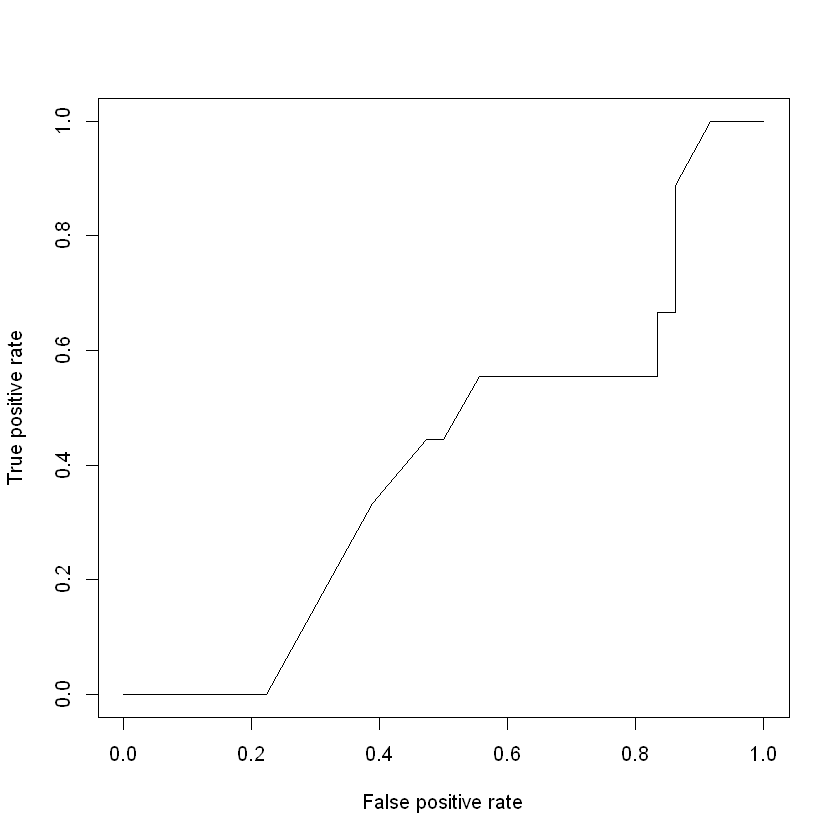

In [12]:
p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [13]:
auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.4089506


Call:
glm(formula = comp2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0783  -0.7784  -0.6404  -0.5544   1.9743  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.49737    0.99716  -0.499    0.618
definitionharmony -0.60267    0.57029  -1.057    0.291
needharmony       -0.04039    0.55840  -0.072    0.942
purposecosmetic    0.48605    0.59659   0.815    0.415
purposeetc        -0.08876    0.57618  -0.154    0.878
interest          -0.11320    0.24102  -0.470    0.639

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 115.80  on 105  degrees of freedom
Residual deviance: 112.79  on 100  degrees of freedom
AIC: 124.79

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,115.8045,NA
definition,1,1.43231803,104,114.3722,0.2313865
need,1,0.03280285,103,114.3394,0.8562769
purpose,2,1.32725123,101,113.0122,0.5149808
interest,1,0.22063824,100,112.7915,0.6385540


[1] 0.4783951

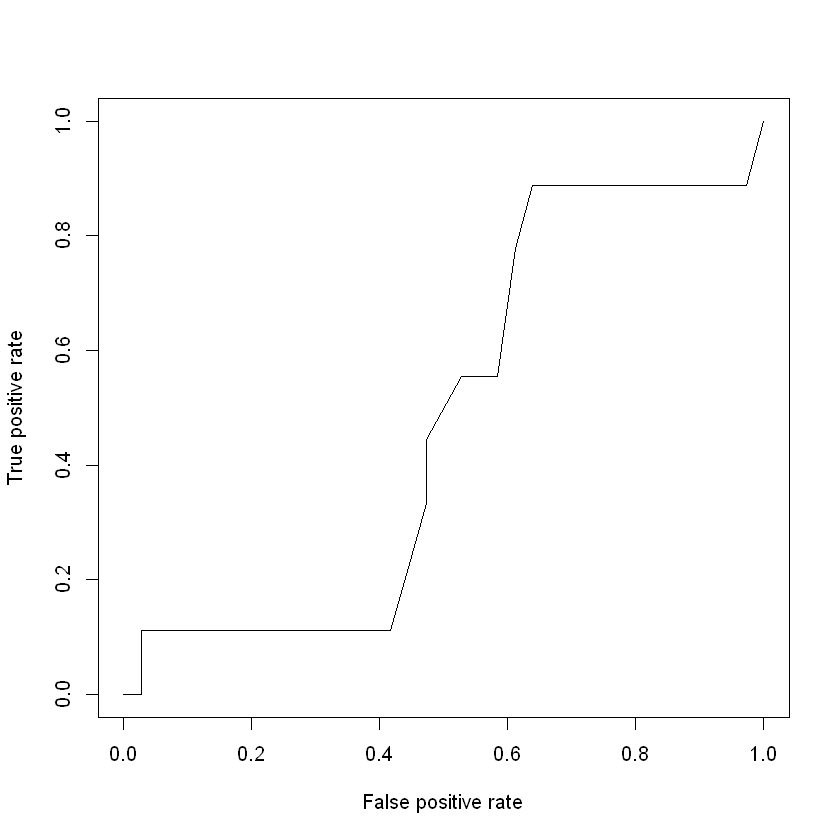

In [14]:
model <- glm(comp2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9207  -0.6332  -0.5291  -0.4597   2.1447  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.91832    1.16032  -0.791    0.429
definitionharmony  0.49690    0.71932   0.691    0.490
needharmony        0.06583    0.63541   0.104    0.917
purposecosmetic   -0.40651    0.71401  -0.569    0.569
purposeetc        -0.14255    0.62327  -0.229    0.819
interest          -0.28335    0.28054  -1.010    0.312

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 93.343  on 105  degrees of freedom
Residual deviance: 90.937  on 100  degrees of freedom
AIC: 102.94

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,93.34256,NA
definition,1,1.03384348,104,92.30872,0.3092577
need,1,0.04504901,103,92.26367,0.8319139
purpose,2,0.29986958,101,91.96380,0.8607641
interest,1,1.02644142,100,90.93736,0.3109959


[1] 0.4558081

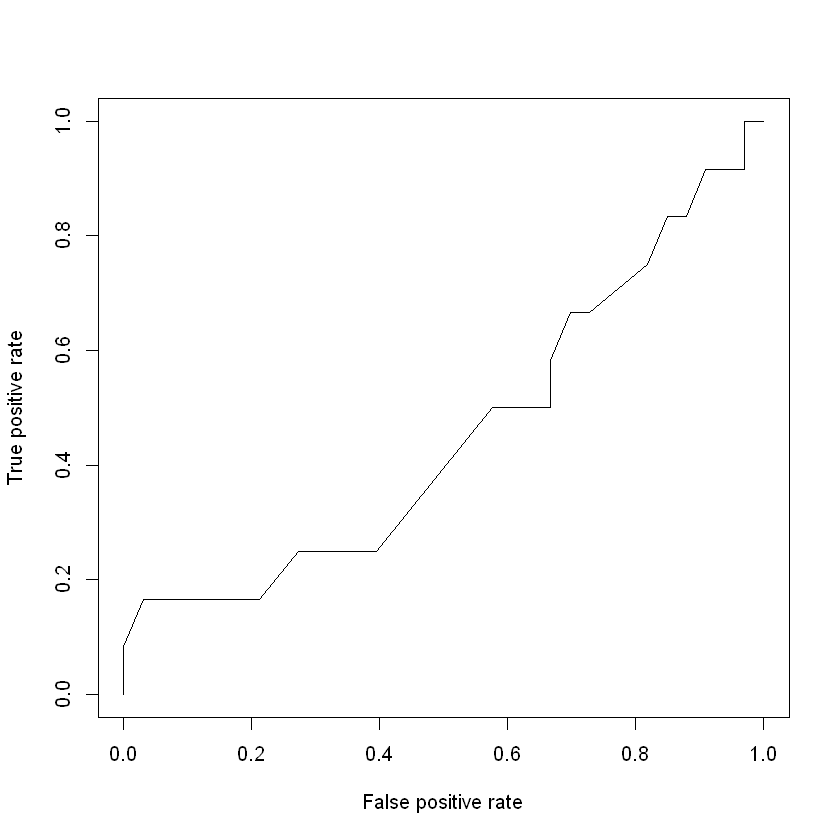

In [15]:
model <- glm(comp3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3891  -0.5140  -0.3714  -0.2412   2.5882  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -1.6836     1.4017  -1.201  0.22970   
definitionharmony   1.5293     0.7496   2.040  0.04134 * 
needharmony        -2.4427     0.8101  -3.015  0.00257 **
purposecosmetic    -0.1228     0.9137  -0.134  0.89306   
purposeetc          1.1173     0.8009   1.395  0.16302   
interest           -0.2389     0.3327  -0.718  0.47273   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 82.746  on 105  degrees of freedom
Residual deviance: 69.928  on 100  degrees of freedom
AIC: 81.928

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,82.74638,NA
definition,1,0.2141891,104,82.53220,0.643503670
need,1,9.2010143,103,73.33118,0.002418811
purpose,2,2.8851989,101,70.44598,0.236312673
interest,1,0.5178480,100,69.92813,0.471761101


[1] 0.2564103

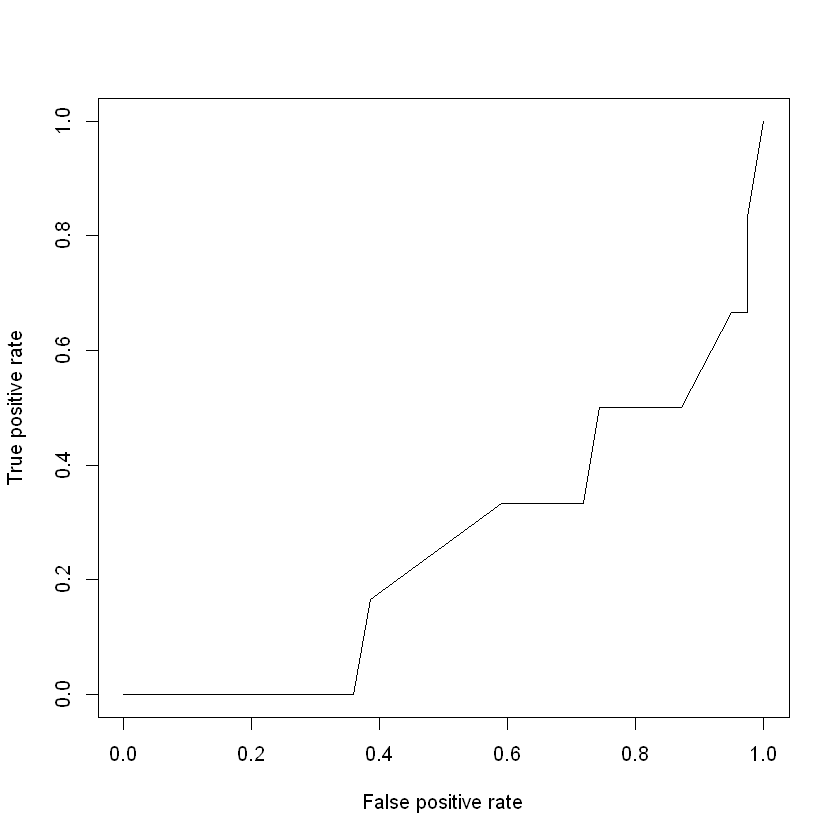

In [16]:
model <- glm(comp4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8527  -0.6523  -0.5321  -0.4608   2.1400  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.80277    1.12986  -0.711    0.477
definitionharmony -0.48410    0.68929  -0.702    0.482
needharmony        0.60689    0.66233   0.916    0.360
purposecosmetic   -0.05763    0.67947  -0.085    0.932
purposeetc        -0.34014    0.63945  -0.532    0.595
interest          -0.20961    0.27652  -0.758    0.448

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 93.343  on 105  degrees of freedom
Residual deviance: 91.386  on 100  degrees of freedom
AIC: 103.39

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,93.34256,NA
definition,1,0.0159339,104,93.32663,0.8995502
need,1,0.8661791,103,92.46045,0.3520153
purpose,2,0.4997244,101,91.96072,0.7789081
interest,1,0.5748178,100,91.38591,0.4483508


[1] 0.3919753

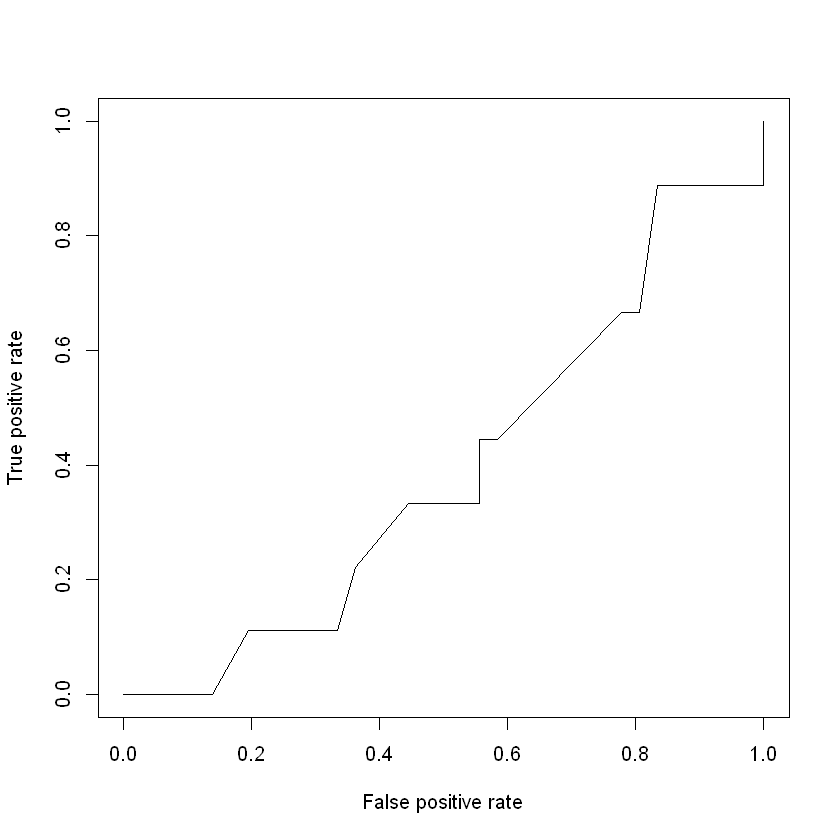

In [17]:
model <- glm(comp5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0801  -0.5241  -0.3795  -0.2444   2.6806  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -5.3773     1.6952  -3.172  0.00151 **
definitionharmony   0.5309     0.9399   0.565  0.57217   
needharmony         1.1183     0.8127   1.376  0.16880   
purposecosmetic     1.2520     0.9070   1.380  0.16746   
purposeetc          0.4666     0.8962   0.521  0.60262   
interest            0.4486     0.3477   1.290  0.19699   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.872  on 105  degrees of freedom
Residual deviance: 67.384  on 100  degrees of freedom
AIC: 79.384

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,74.87191,NA
definition,1,2.007366,104,72.86454,0.1565369
need,1,1.569452,103,71.29509,0.2102867
purpose,2,2.143740,101,69.15135,0.3423677
interest,1,1.767674,100,67.38368,0.1836702


[1] 0.3969595

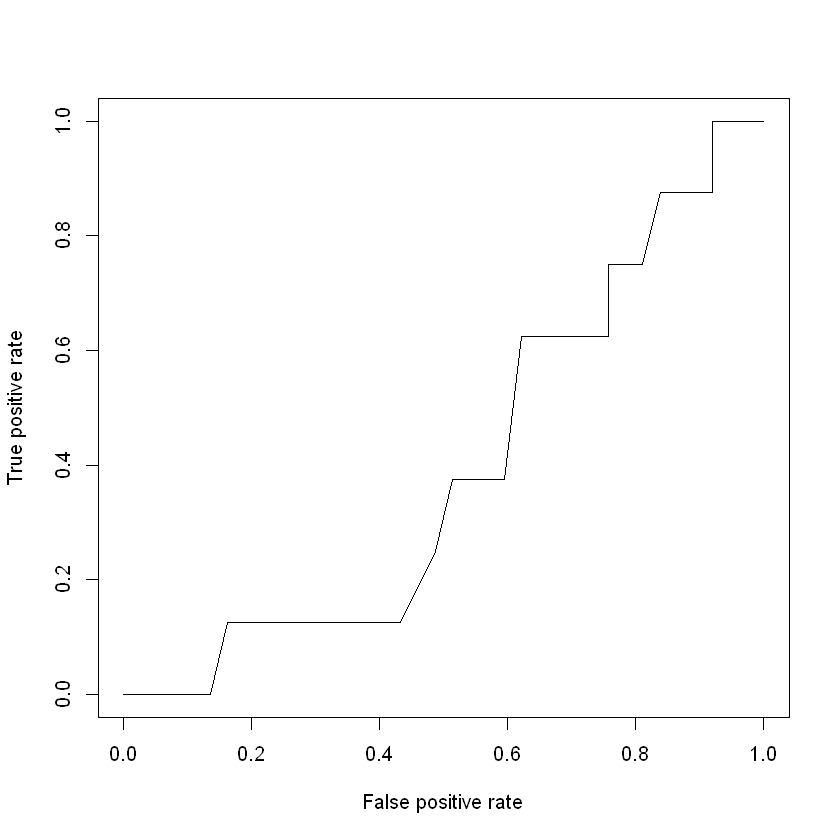

In [18]:
model <- glm(t1_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0739  -0.5028  -0.2946  -0.2268   2.8473  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)        0.038214   1.418816   0.027   0.9785  
definitionharmony -1.944473   0.959520  -2.027   0.0427 *
needharmony        0.188584   0.940159   0.201   0.8410  
purposecosmetic   -0.002973   1.097760  -0.003   0.9978  
purposeetc         1.452117   0.879424   1.651   0.0987 .
interest          -0.579583   0.351666  -1.648   0.0993 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.872  on 105  degrees of freedom
Residual deviance: 62.736  on 100  degrees of freedom
AIC: 74.736

Number of Fisher Scoring iterations: 6


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,74.87191,NA
definition,1,6.068509907,104,68.80340,0.01376130
need,1,0.005142574,103,68.79826,0.94283131
purpose,2,3.204179808,101,65.59408,0.20147501
interest,1,2.857692544,100,62.73638,0.09093786


[1] 0.362782

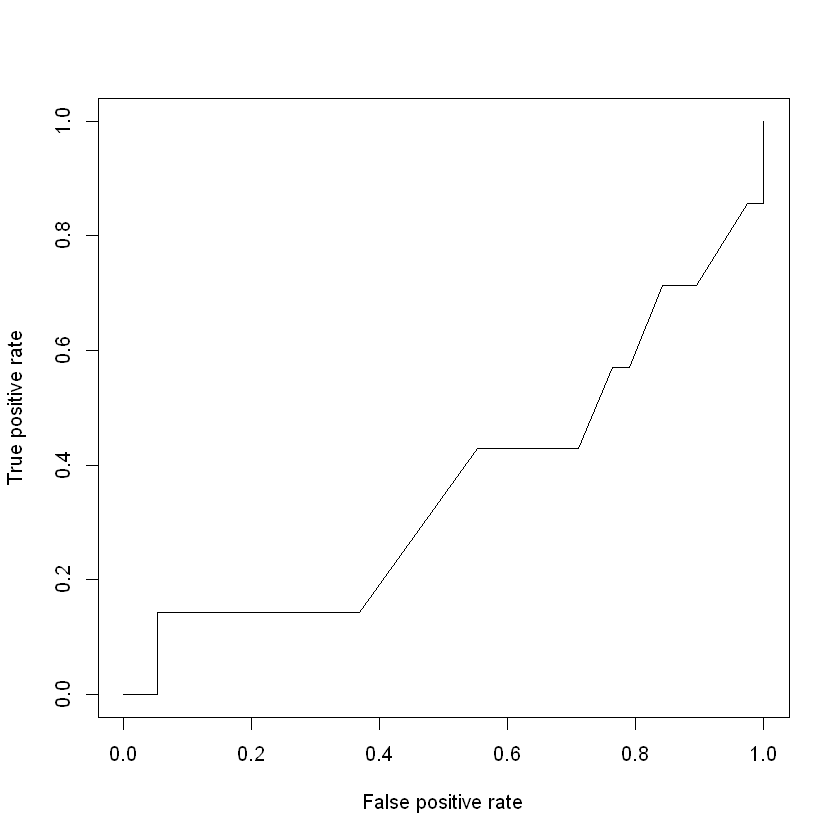

In [19]:
model <- glm(t1_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9937  -0.7901  -0.6822  -0.5647   1.9412  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.31069    0.98918  -0.314    0.753
definitionharmony  0.03611    0.58343   0.062    0.951
needharmony        0.01006    0.54810   0.018    0.985
purposecosmetic    0.10769    0.58929   0.183    0.855
purposeetc        -0.21589    0.55919  -0.386    0.699
interest          -0.24576    0.24061  -1.021    0.307

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 115.80  on 105  degrees of freedom
Residual deviance: 114.09  on 100  degrees of freedom
AIC: 126.09

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,115.8045,NA
definition,1,5.654997e-02,104,115.7480,0.8120344
need,1,3.581109e-05,103,115.7479,0.9952253
purpose,2,6.090499e-01,101,115.1389,0.7374736
interest,1,1.051603e+00,100,114.0873,0.3051381


[1] 0.4628571

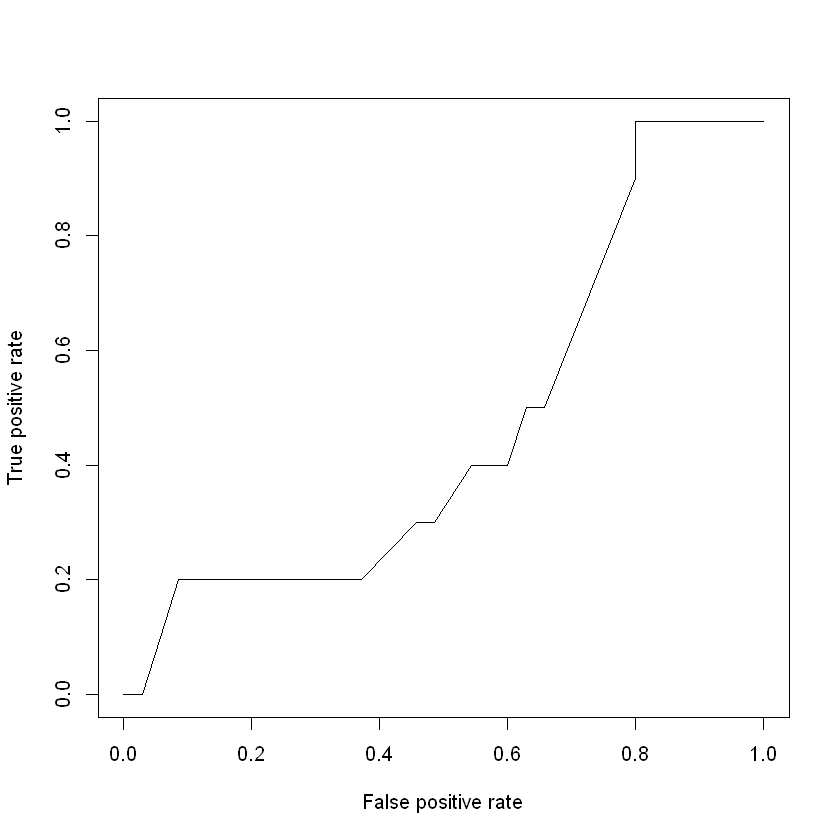

In [20]:
model <- glm(t1_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1069  -0.9025  -0.8054   1.4356   1.6953  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.46180    0.94815  -1.542    0.123
definitionharmony -0.04104    0.53277  -0.077    0.939
needharmony        0.26208    0.50236   0.522    0.602
purposecosmetic   -0.28181    0.56323  -0.500    0.617
purposeetc        -0.21667    0.50040  -0.433    0.665
interest           0.20633    0.22462   0.919    0.358

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 131.47  on 105  degrees of freedom
Residual deviance: 130.04  on 100  degrees of freedom
AIC: 142.04

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,131.4725,NA
definition,1,0.008465271,104,131.4640,0.9266925
need,1,0.283316807,103,131.1807,0.5945355
purpose,2,0.281328441,101,130.8994,0.8687810
interest,1,0.858121787,100,130.0413,0.3542648


[1] 0.53125

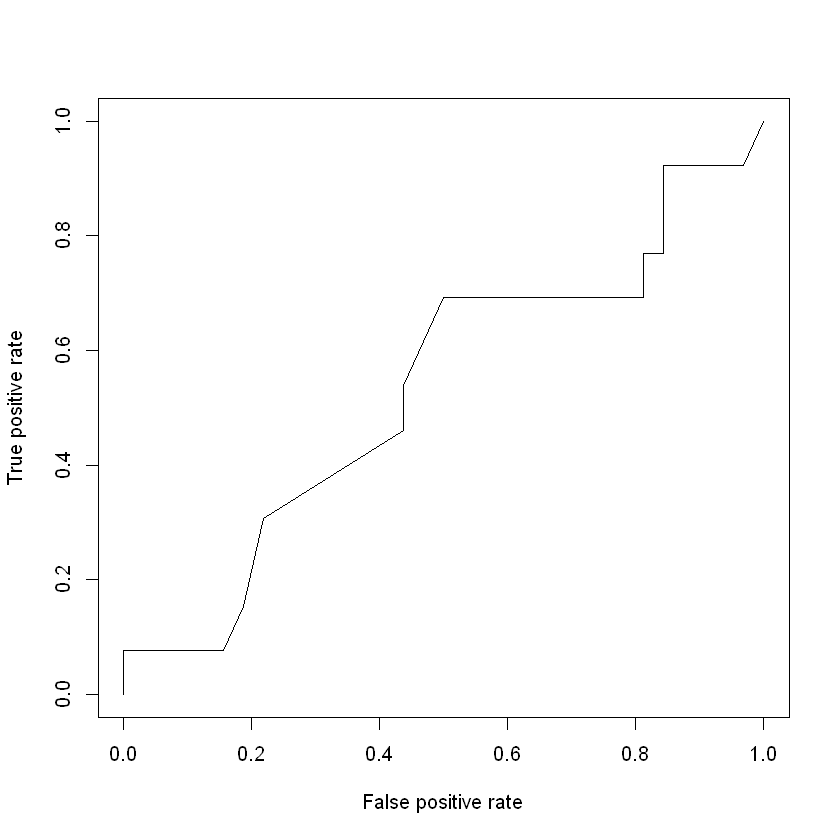

In [21]:
model <- glm(t1_4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0773  -0.7471  -0.6259  -0.5325   1.9060  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -1.1599     1.0441  -1.111    0.267
definitionharmony   0.7583     0.5888   1.288    0.198
needharmony        -0.8531     0.5494  -1.553    0.121
purposecosmetic    -0.5056     0.6186  -0.817    0.414
purposeetc         -0.4378     0.5565  -0.787    0.431
interest            0.0404     0.2509   0.161    0.872

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 113.40  on 105  degrees of freedom
Residual deviance: 109.78  on 100  degrees of freedom
AIC: 121.78

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,113.4005,NA
definition,1,0.3239468,104,113.0766,0.5692453
need,1,2.4167071,103,110.6599,0.1200470
purpose,2,0.8561536,101,109.8037,0.6517613
interest,1,0.0259653,100,109.7778,0.8719851


[1] 0.5413534

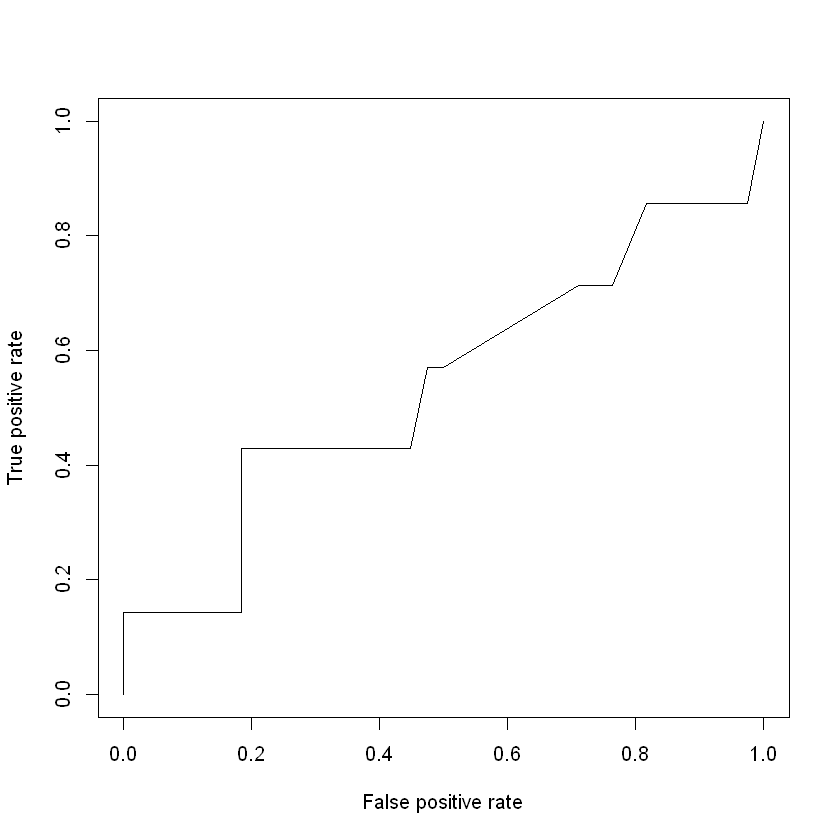

In [22]:
model <- glm(t1_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9573  -0.7442  -0.5829  -0.5179   2.1239  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.05269    1.10669  -1.855   0.0636 .
definitionharmony  0.47312    0.61600   0.768   0.4425  
needharmony       -0.52940    0.57795  -0.916   0.3597  
purposecosmetic    0.07120    0.69813   0.102   0.9188  
purposeetc         0.67080    0.60205   1.114   0.2652  
interest           0.09152    0.25572   0.358   0.7204  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 108.27  on 105  degrees of freedom
Residual deviance: 105.51  on 100  degrees of freedom
AIC: 117.51

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,108.2660,NA
definition,1,0.05735698,104,108.2086,0.8107232
need,1,0.68153703,103,107.5271,0.4090580
purpose,2,1.89017622,101,105.6369,0.3886453
interest,1,0.12873507,100,105.5082,0.7197472


[1] 0.3996914

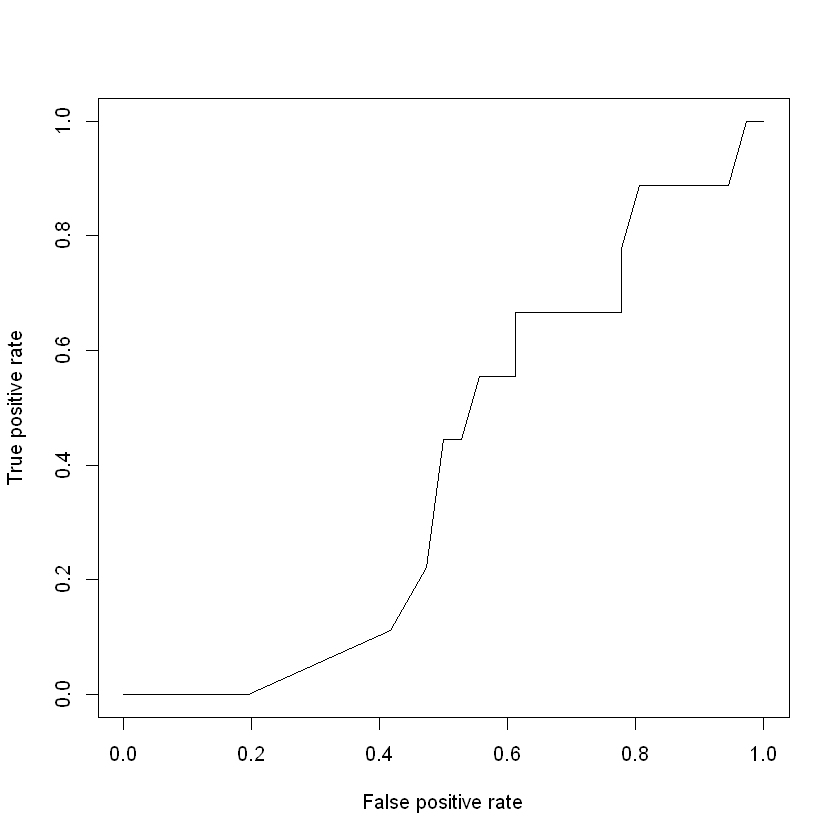

In [23]:
model <- glm(t2_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0528  -0.6965  -0.5020  -0.3323   2.4946  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -1.3060     1.1452  -1.140    0.254  
definitionharmony   0.1506     0.7197   0.209    0.834  
needharmony         1.2283     0.6556   1.874    0.061 .
purposecosmetic    -0.1763     0.6411  -0.275    0.783  
purposeetc         -0.7747     0.6245  -1.240    0.215  
interest           -0.1971     0.2704  -0.729    0.466  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 102.672  on 105  degrees of freedom
Residual deviance:  94.073  on 100  degrees of freedom
AIC: 106.07

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,102.67206,NA
definition,1,2.2999334,104,100.37213,0.12937955
need,1,3.7088549,103,96.66327,0.05412451
purpose,2,2.0566300,101,94.60664,0.35760903
interest,1,0.5331932,100,94.07345,0.46526745


[1] 0.4081197

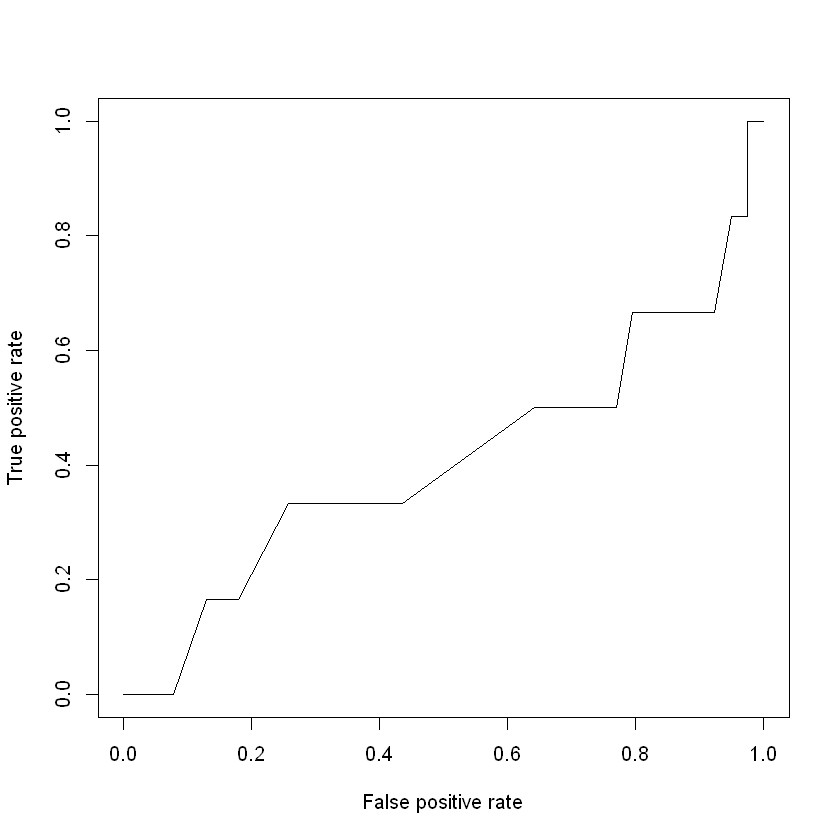

In [24]:
model <- glm(t2_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9482  -0.6902  -0.6484  -0.5694   1.9562  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.738352   1.011366  -0.730    0.465
definitionharmony -0.738684   0.577457  -1.279    0.201
needharmony        0.130792   0.568251   0.230    0.818
purposecosmetic   -0.008478   0.606432  -0.014    0.989
purposeetc        -0.301428   0.563885  -0.535    0.593
interest           0.008234   0.245108   0.034    0.973

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 113.40  on 105  degrees of freedom
Residual deviance: 111.08  on 100  degrees of freedom
AIC: 123.08

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,113.4005,NA
definition,1,1.891865160,104,111.5087,0.1689917
need,1,0.044353250,103,111.4643,0.8331978
purpose,2,0.378250876,101,111.0861,0.8276827
interest,1,0.001128923,100,111.0849,0.9731966


[1] 0.4085714

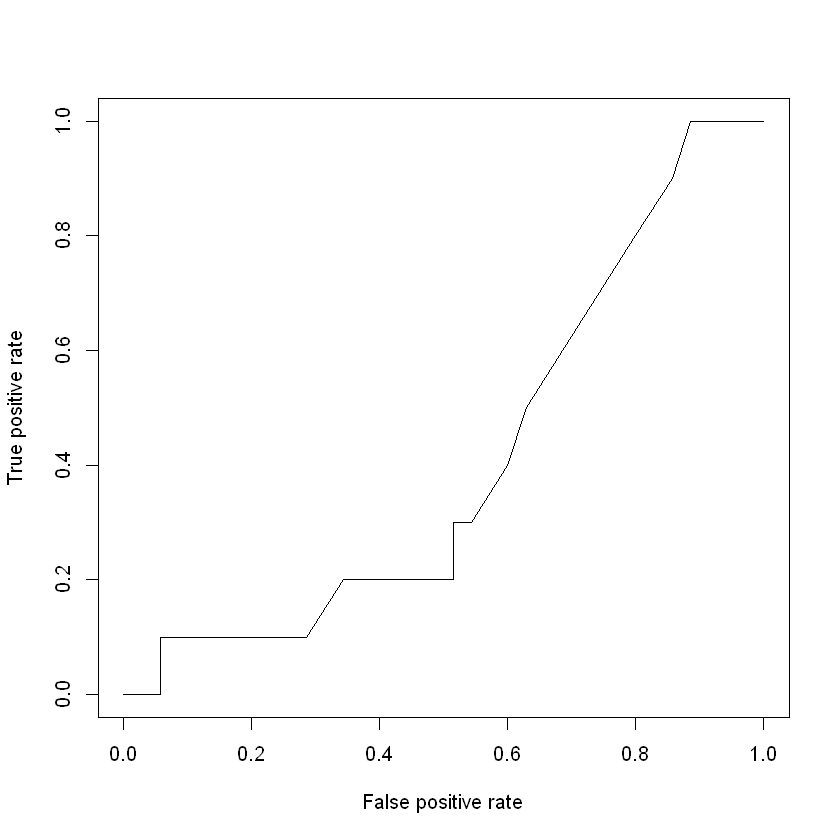

In [25]:
model <- glm(t2_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9889  -0.7251  -0.7027  -0.5117   1.8119  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.07581    1.00196  -1.074    0.283
definitionharmony  0.58367    0.56865   1.026    0.305
needharmony       -0.73703    0.53493  -1.378    0.168
purposecosmetic    0.05903    0.59216   0.100    0.921
purposeetc        -0.12696    0.55479  -0.229    0.819
interest          -0.01402    0.23943  -0.059    0.953

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 118.10  on 105  degrees of freedom
Residual deviance: 115.76  on 100  degrees of freedom
AIC: 127.76

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,118.1038,NA
definition,1,0.158356224,104,117.9455,0.6906744
need,1,2.051430958,103,115.8940,0.1520632
purpose,2,0.128419475,101,115.7656,0.9378083
interest,1,0.003427456,100,115.7622,0.9533149


[1] 0.4408784

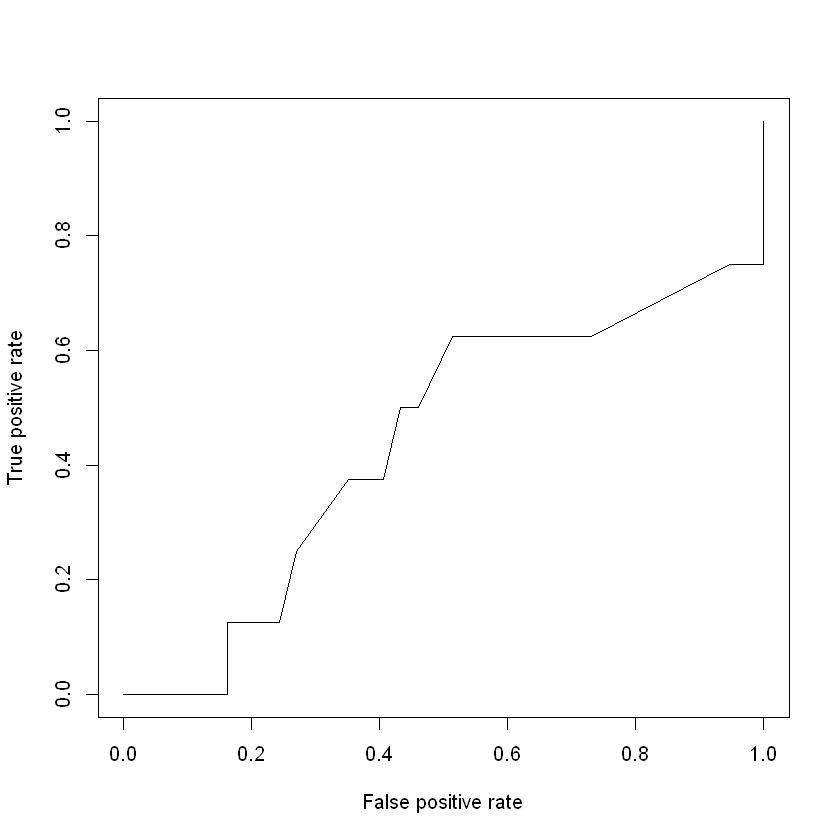

In [26]:
model <- glm(t2_4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7827  -0.5799  -0.4751  -0.4047   2.2331  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -2.4567     1.3165  -1.866    0.062 .
definitionharmony  -0.5600     0.7441  -0.753    0.452  
needharmony         0.2749     0.7291   0.377    0.706  
purposecosmetic     0.1684     0.8685   0.194    0.846  
purposeetc          0.7095     0.7305   0.971    0.331  
interest            0.1116     0.3044   0.367    0.714  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 82.746  on 105  degrees of freedom
Residual deviance: 80.536  on 100  degrees of freedom
AIC: 92.536

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,82.74638,NA
definition,1,0.5523720,104,82.19401,0.4573501
need,1,0.1552722,103,82.03874,0.6935472
purpose,2,1.3672051,101,80.67154,0.5047952
interest,1,0.1354945,100,80.53604,0.7128018


[1] 0.5239899

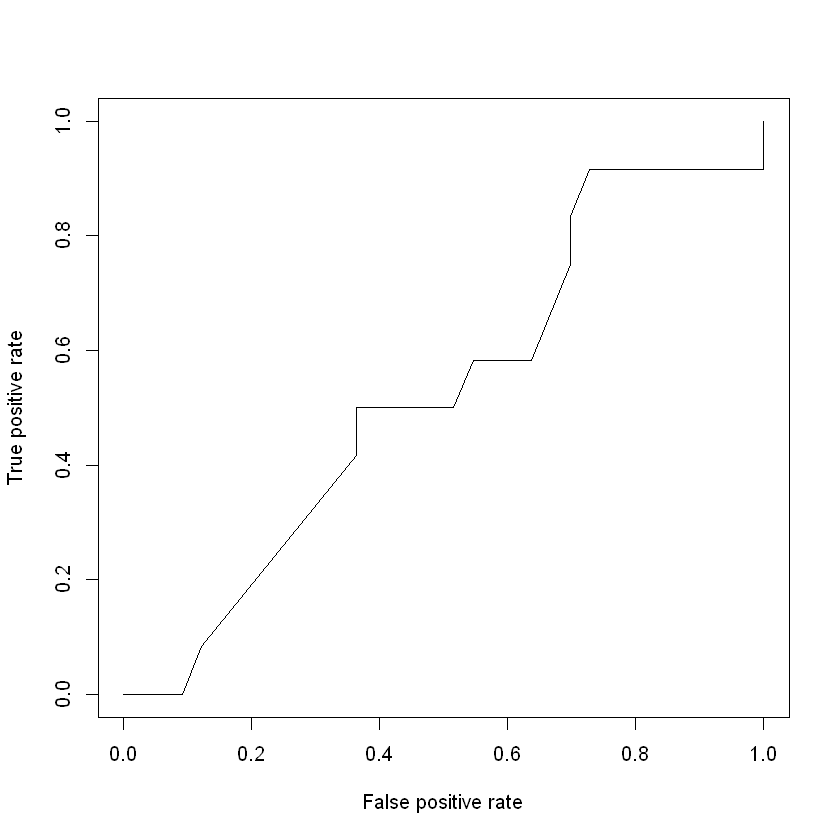

In [27]:
model <- glm(t2_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8016  -0.6978  -0.6362  -0.5504   2.0136  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.24929    1.06853  -1.169    0.242
definitionharmony -0.21067    0.63501  -0.332    0.740
needharmony        0.39146    0.60190   0.650    0.515
purposecosmetic   -0.07099    0.67417  -0.105    0.916
purposeetc         0.24260    0.58472   0.415    0.678
interest          -0.08879    0.25419  -0.349    0.727

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 105.53  on 105  degrees of freedom
Residual deviance: 104.64  on 100  degrees of freedom
AIC: 116.64

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,105.5284,NA
definition,1,0.004629326,104,105.5238,0.9457545
need,1,0.505549092,103,105.0183,0.4770720
purpose,2,0.254401681,101,104.7639,0.8805568
interest,1,0.121795768,100,104.6421,0.7270949


[1] 0.4871795

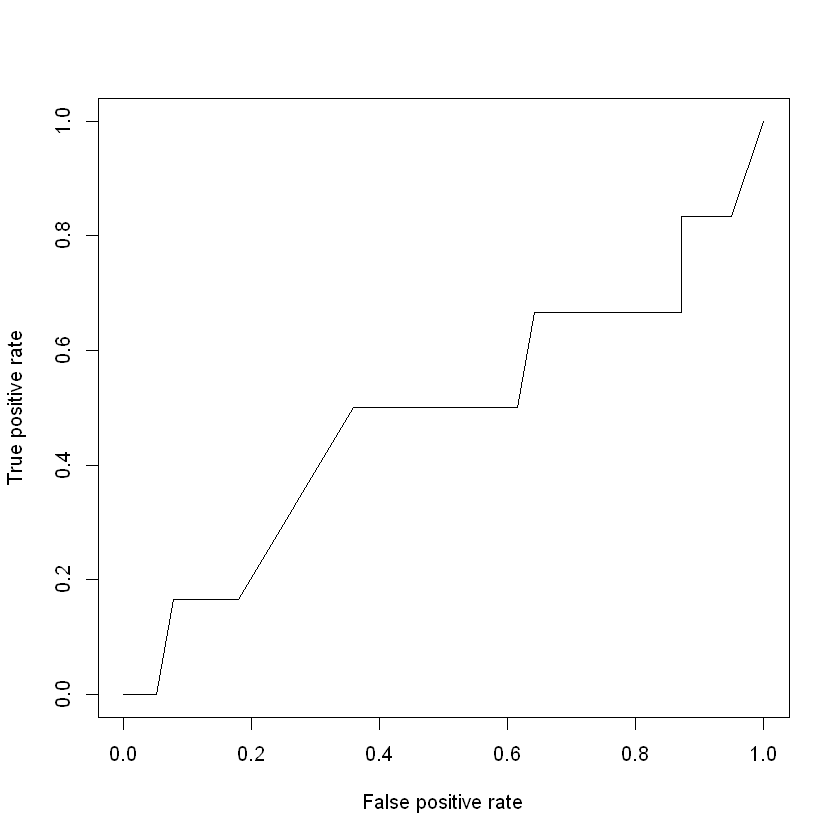

In [28]:
model <- glm(d1_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4005  -0.9762  -0.7829   1.2008   1.7202  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)         0.7544     0.8995   0.839    0.402
definitionharmony  -0.4203     0.4982  -0.844    0.399
needharmony        -0.6163     0.4818  -1.279    0.201
purposecosmetic    -0.3049     0.5387  -0.566    0.571
purposeetc         -0.3297     0.4884  -0.675    0.500
interest           -0.1219     0.2147  -0.568    0.570

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 141.47  on 105  degrees of freedom
Residual deviance: 136.08  on 100  degrees of freedom
AIC: 148.08

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,141.4658,NA
definition,1,2.9165110,104,138.5493,0.08767725
need,1,1.5438709,103,137.0055,0.21404254
purpose,2,0.6017095,101,136.4037,0.74018527
interest,1,0.3229931,100,136.0807,0.56981441


[1] 0.5817972

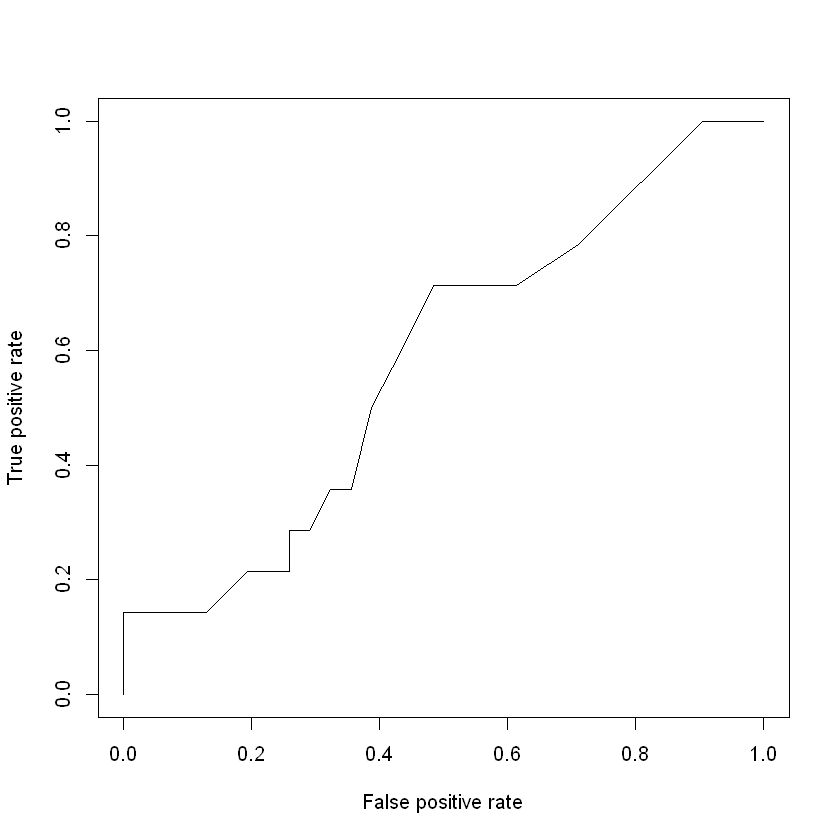

In [29]:
model <- glm(d1_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7234  -0.5382  -0.4475  -0.2426   2.5639  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -4.4428     1.6913  -2.627  0.00862 **
definitionharmony  -0.0306     0.8984  -0.034  0.97283   
needharmony         0.6822     0.8310   0.821  0.41168   
purposecosmetic     1.6800     1.1598   1.449  0.14746   
purposeetc          1.5156     1.1152   1.359  0.17411   
interest            0.1808     0.3375   0.536  0.59218   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 70.659  on 105  degrees of freedom
Residual deviance: 66.288  on 100  degrees of freedom
AIC: 78.288

Number of Fisher Scoring iterations: 6


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,70.65878,NA
definition,1,0.2529863,104,70.40580,0.6149801
need,1,0.5492081,103,69.85659,0.4586415
purpose,2,3.2768571,101,66.57973,0.1942851
interest,1,0.2919091,100,66.28782,0.5889997


[1] 0.5325

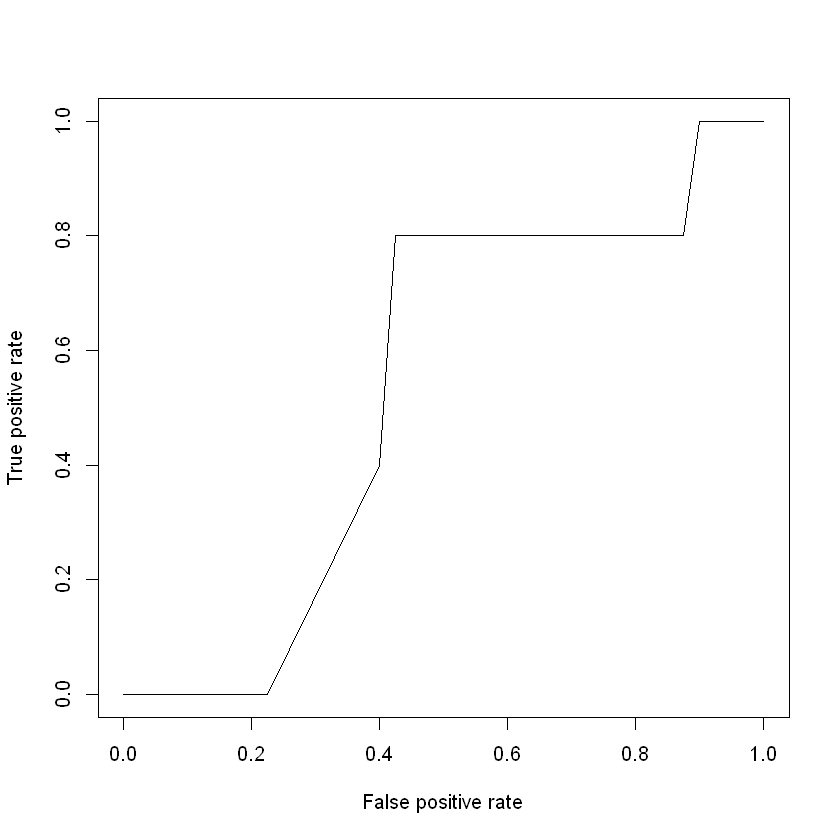

In [30]:
model <- glm(d1_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8203  -0.7012  -0.5051  -0.3930   2.1507  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -2.6703     1.2703  -2.102   0.0355 *
definitionharmony   0.9388     0.7691   1.221   0.2222  
needharmony         0.2479     0.6337   0.391   0.6957  
purposecosmetic    -0.7167     0.7702  -0.931   0.3521  
purposeetc         -0.1053     0.6152  -0.171   0.8641  
interest            0.1134     0.2864   0.396   0.6921  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 93.343  on 105  degrees of freedom
Residual deviance: 89.232  on 100  degrees of freedom
AIC: 101.23

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,93.34256,NA
definition,1,2.6340304,104,90.70853,0.1045959
need,1,0.2323251,103,90.47621,0.6298052
purpose,2,1.0862652,101,89.38994,0.5809256
interest,1,0.1578437,100,89.23210,0.6911496


[1] 0.7142857

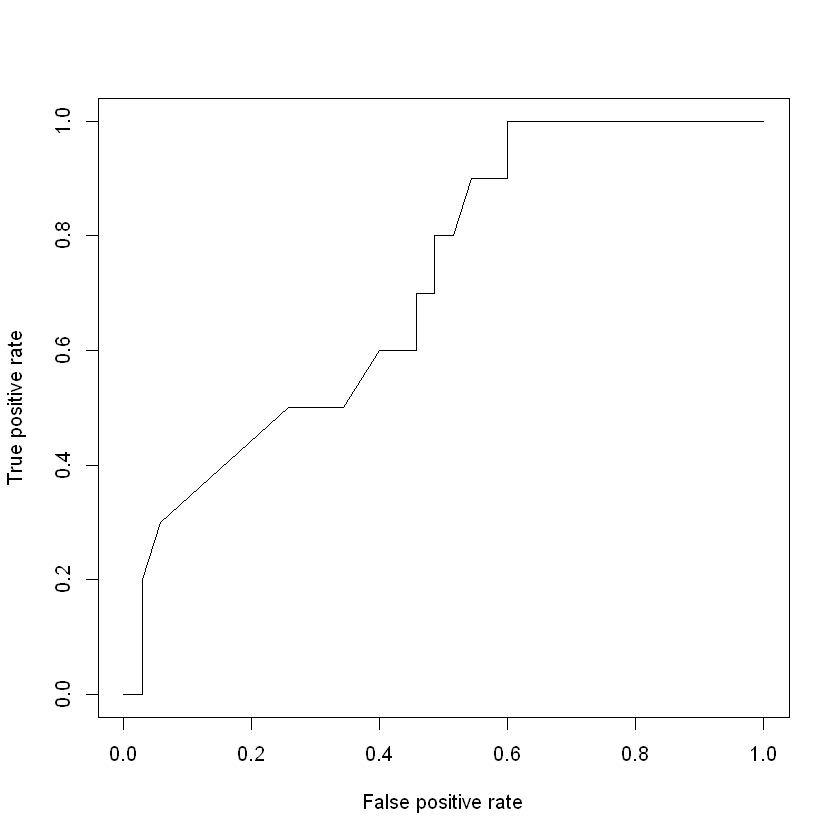

In [31]:
model <- glm(d1_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0631  -0.8132  -0.7010   1.3437   1.8288  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.23404    1.03522  -2.158   0.0309 *
definitionharmony  0.32085    0.56022   0.573   0.5668  
needharmony       -0.16566    0.52339  -0.317   0.7516  
purposecosmetic   -0.41431    0.61279  -0.676   0.4990  
purposeetc        -0.06758    0.52465  -0.129   0.8975  
interest           0.34116    0.24288   1.405   0.1601  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 122.40  on 105  degrees of freedom
Residual deviance: 119.43  on 100  degrees of freedom
AIC: 131.43

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,122.3991,NA
definition,1,0.05648987,104,122.3426,0.8121324
need,1,0.08121255,103,122.2614,0.7756609
purpose,2,0.78557547,101,121.4758,0.6751720
interest,1,2.04799975,100,119.4278,0.1524063


[1] 0.3783422

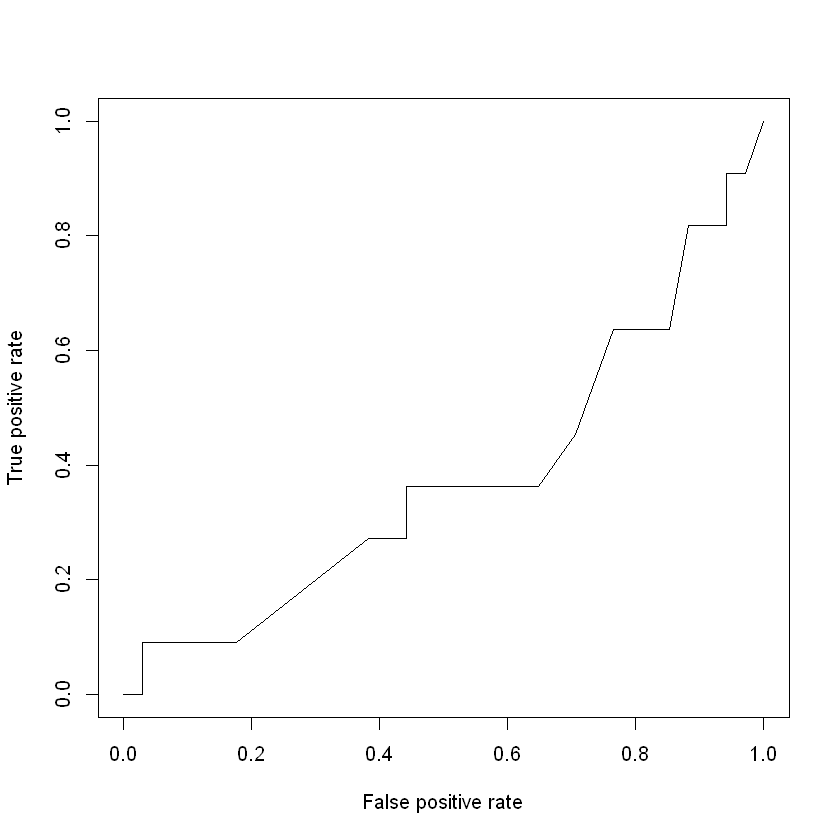

In [32]:
model <- glm(d2_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1434  -0.8245  -0.7329   1.3216   1.9385  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)         0.2131     0.9468   0.225    0.822
definitionharmony  -0.3492     0.5530  -0.632    0.528
needharmony         0.2421     0.5287   0.458    0.647
purposecosmetic    -0.8307     0.5926  -1.402    0.161
purposeetc         -0.4507     0.5032  -0.896    0.370
interest           -0.1866     0.2298  -0.812    0.417

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 126.31  on 105  degrees of freedom
Residual deviance: 123.08  on 100  degrees of freedom
AIC: 135.08

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,126.3058,NA
definition,1,0.1354629,104,126.1703,0.7128339
need,1,0.3629638,103,125.8074,0.5468648
purpose,2,2.0672280,101,123.7401,0.3557191
interest,1,0.6615089,100,123.0786,0.4160277


[1] 0.575188

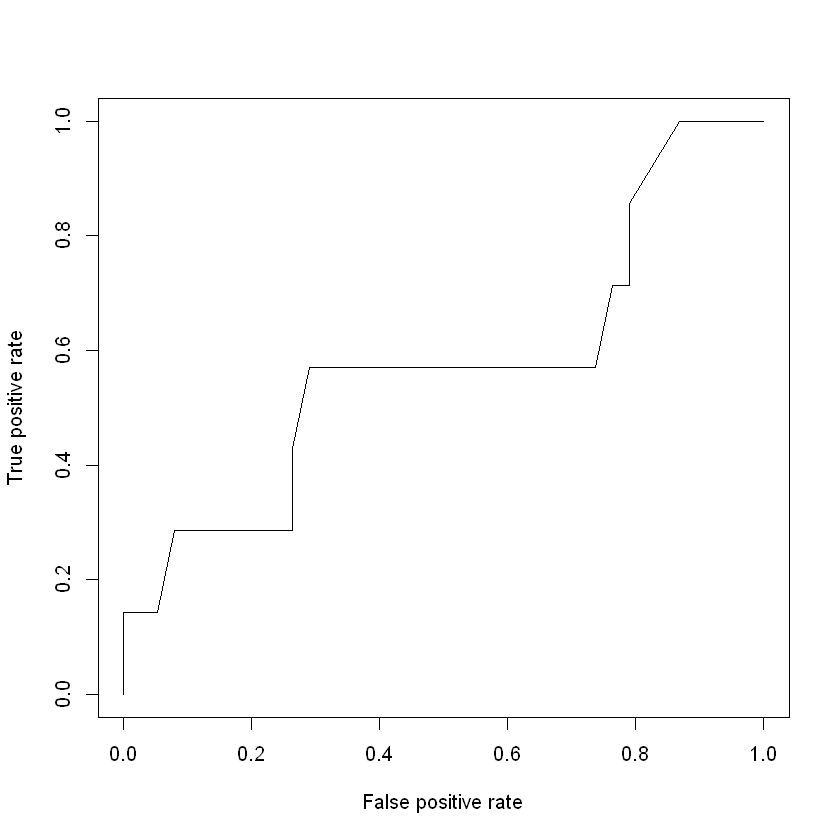

In [33]:
model <- glm(d2_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7187  -0.6457  -0.5328  -0.3394   2.4245  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -3.25421    1.35945  -2.394   0.0167 *
definitionharmony  0.19239    0.76731   0.251   0.8020  
needharmony        0.37233    0.69845   0.533   0.5940  
purposecosmetic    1.17237    0.88638   1.323   0.1860  
purposeetc         1.16150    0.83478   1.391   0.1641  
interest           0.05907    0.29169   0.203   0.8395  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.431  on 105  degrees of freedom
Residual deviance: 82.992  on 100  degrees of freedom
AIC: 94.992

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,86.43115,NA
definition,1,0.4290213,104,86.00213,0.5124696
need,1,0.2370968,103,85.76503,0.6263109
purpose,2,2.7322625,101,83.03277,0.2550919
interest,1,0.0411604,100,82.99161,0.8392286


[1] 0.6775

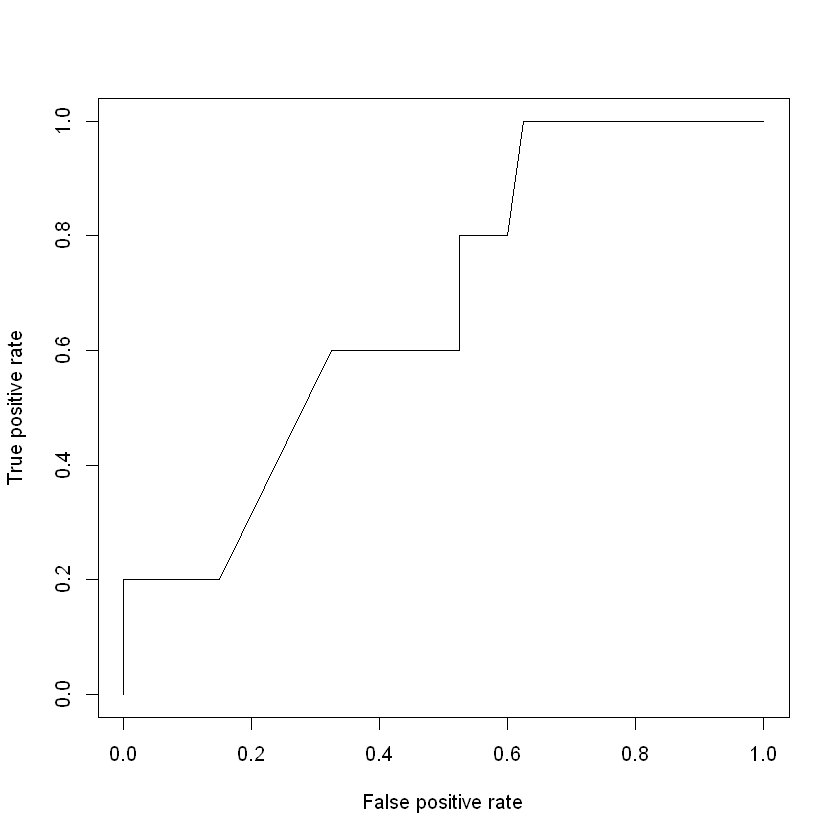

In [34]:
model <- glm(d2_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0938  -0.7610  -0.6466  -0.4831   2.0976  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)        0.037673   1.001400   0.038    0.970
definitionharmony  0.336158   0.587257   0.572    0.567
needharmony       -0.583736   0.554952  -1.052    0.293
purposecosmetic    0.386452   0.599071   0.645    0.519
purposeetc         0.008857   0.579433   0.015    0.988
interest          -0.376310   0.246041  -1.529    0.126

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 115.80  on 105  degrees of freedom
Residual deviance: 111.22  on 100  degrees of freedom
AIC: 123.22

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,115.8045,NA
definition,1,0.05654997,104,115.7480,0.8120344
need,1,1.16269750,103,114.5853,0.2809068
purpose,2,0.96183420,101,113.6235,0.6182162
interest,1,2.39995285,100,111.2235,0.1213389


[1] 0.3644444

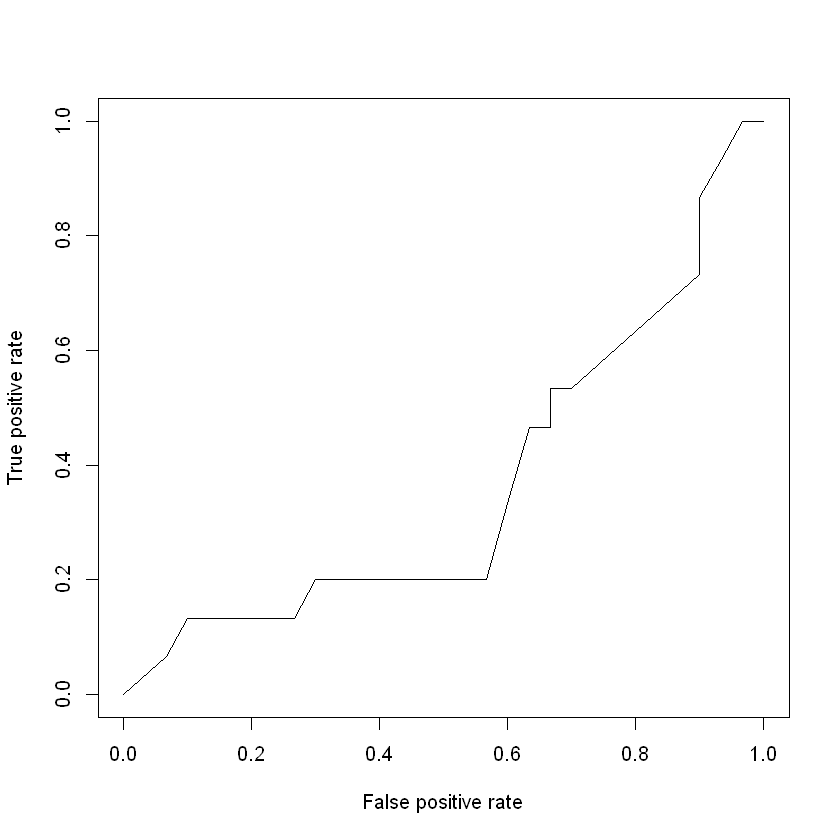

In [35]:
model <- glm(d2_4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7960  -0.4315  -0.3460  -0.2775   2.5394  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -4.16044    1.80979  -2.299   0.0215 *
definitionharmony -0.96550    0.91929  -1.050   0.2936  
needharmony        0.57948    0.91060   0.636   0.5245  
purposecosmetic    0.71206    0.98221   0.725   0.4685  
purposeetc        -0.04877    0.97235  -0.050   0.9600  
interest           0.47050    0.41344   1.138   0.2551  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 56.724  on 105  degrees of freedom
Residual deviance: 53.469  on 100  degrees of freedom
AIC: 65.469

Number of Fisher Scoring iterations: 6


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,56.72440,NA
definition,1,0.9439335,104,55.78046,0.3312683
need,1,0.3443427,103,55.43612,0.5573332
purpose,2,0.5838907,101,54.85223,0.7468094
interest,1,1.3834247,100,53.46881,0.2395187


[1] 0.4135338

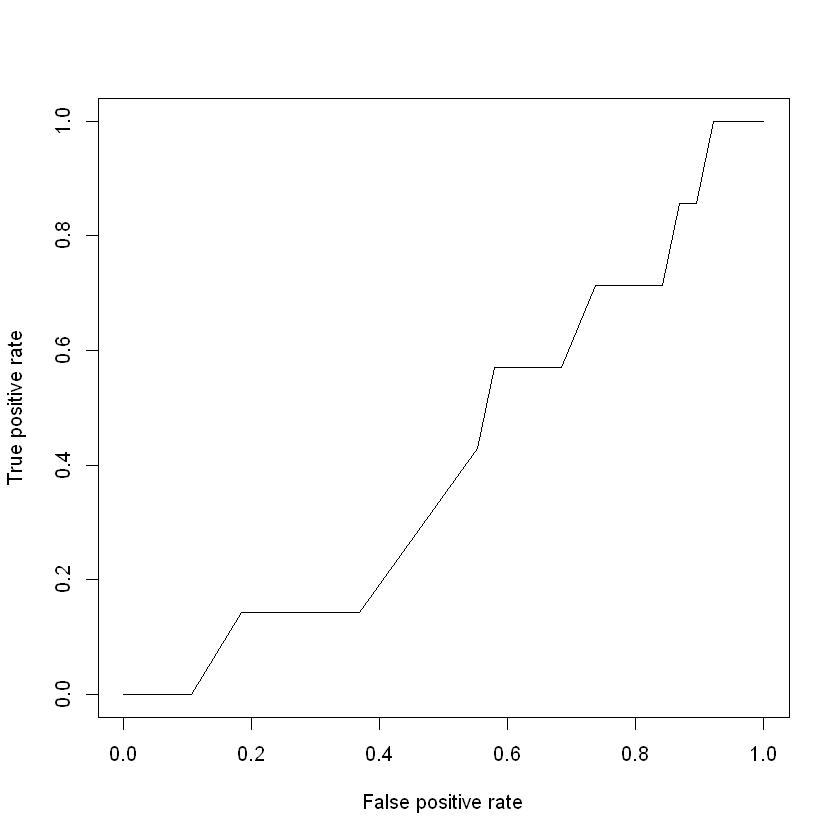

In [36]:
model <- glm(d2_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4660  -0.7764  -0.5464   1.0517   2.3148  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -0.9940     1.0229  -0.972   0.3312  
definitionharmony  -0.5289     0.5468  -0.967   0.3335  
needharmony        -0.5607     0.5405  -1.037   0.2995  
purposecosmetic     0.4663     0.5565   0.838   0.4021  
purposeetc         -1.2353     0.6077  -2.033   0.0421 *
interest            0.2369     0.2521   0.940   0.3473  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 122.40  on 105  degrees of freedom
Residual deviance: 109.25  on 100  degrees of freedom
AIC: 121.25

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,122.3991,NA
definition,1,2.5659346,104,119.8331,0.10918801
need,1,1.5102252,103,118.3229,0.21910472
purpose,2,8.1753001,101,110.1476,0.01677862
interest,1,0.9009059,100,109.2467,0.34253892


[1] 0.5244361

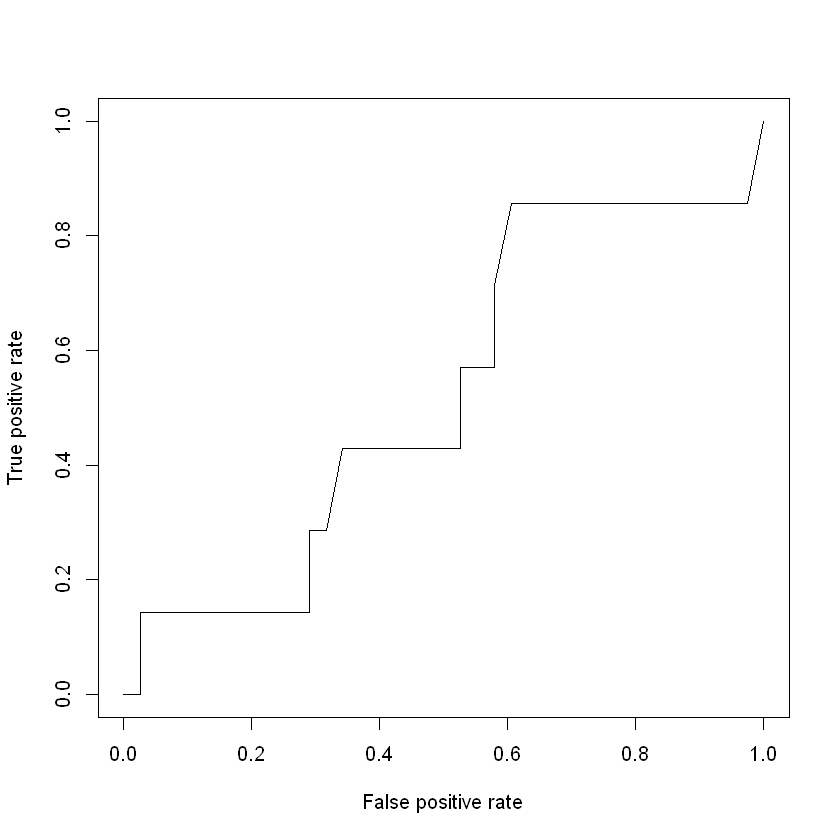

In [37]:
model <- glm(d3_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8662  -0.7153  -0.5646  -0.3944   2.1799  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -1.2833     1.1264  -1.139    0.255
definitionharmony  -0.3057     0.6889  -0.444    0.657
needharmony         0.7106     0.6546   1.085    0.278
purposecosmetic    -0.6410     0.7676  -0.835    0.404
purposeetc          0.2581     0.5890   0.438    0.661
interest           -0.1181     0.2688  -0.439    0.660

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 99.692  on 105  degrees of freedom
Residual deviance: 96.295  on 100  degrees of freedom
AIC: 108.3

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,99.69239,NA
definition,1,0.0591810,104,99.63321,0.8077951
need,1,1.5652841,103,98.06793,0.2108932
purpose,2,1.5797091,101,96.48822,0.4539108
interest,1,0.1928142,100,96.29541,0.6605846


[1] 0.8007519

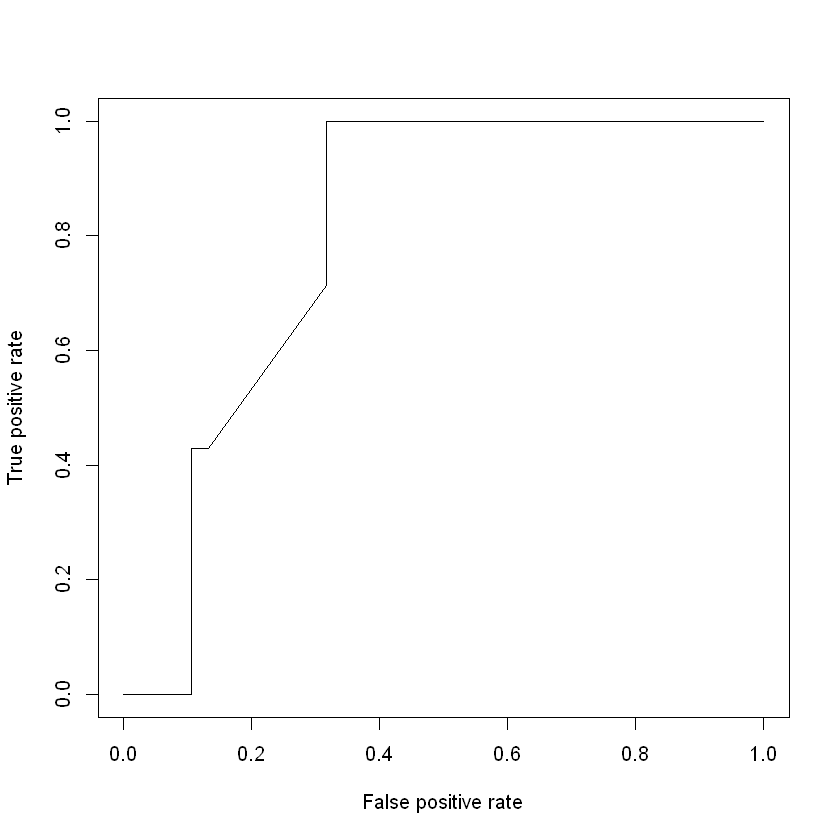

In [38]:
model <- glm(d3_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0750  -0.6619  -0.5421  -0.4022   2.1747  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -3.15085    1.26670  -2.487   0.0129 *
definitionharmony  0.85902    0.68051   1.262   0.2068  
needharmony       -0.71265    0.61899  -1.151   0.2496  
purposecosmetic    0.05577    0.77123   0.072   0.9424  
purposeetc         0.66417    0.66233   1.003   0.3160  
interest           0.27637    0.28468   0.971   0.3316  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 96.584  on 105  degrees of freedom
Residual deviance: 92.188  on 100  degrees of freedom
AIC: 104.19

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,96.58443,NA
definition,1,0.3798415,104,96.20458,0.5376881
need,1,1.1570554,103,95.04753,0.2820771
purpose,2,1.8933953,101,93.15413,0.3880203
interest,1,0.9656459,100,92.18849,0.3257685


[1] 0.5600962

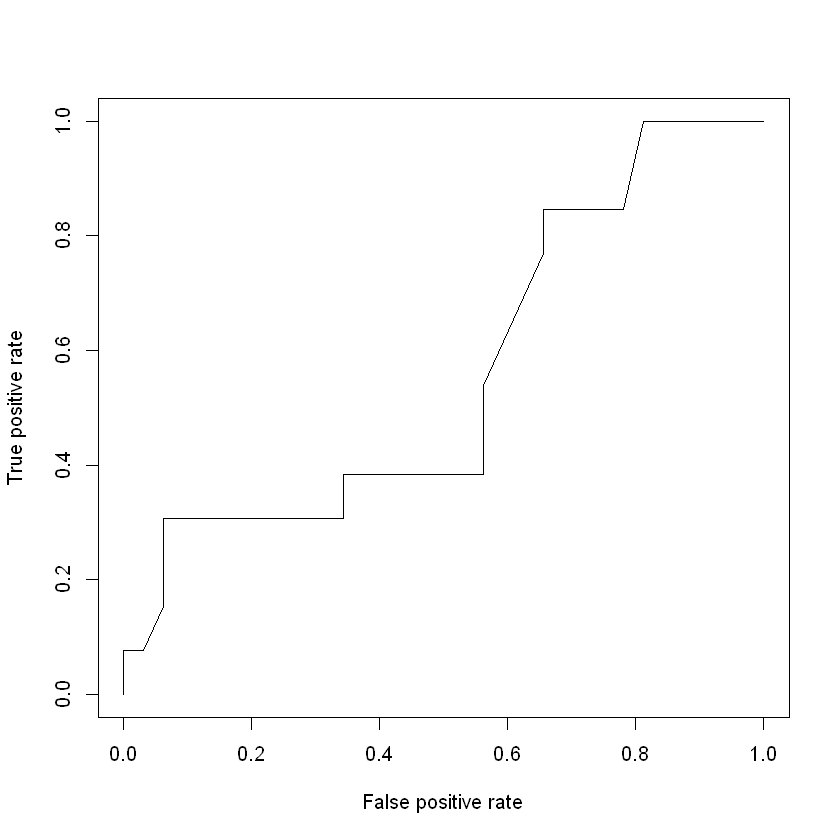

In [39]:
model <- glm(d3_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7599  -0.5808  -0.4282  -0.2559   2.6213  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -1.6151     1.3771  -1.173    0.241
definitionharmony  -0.4558     0.8229  -0.554    0.580
needharmony         0.1127     0.8027   0.140    0.888
purposecosmetic    -1.0598     1.1912  -0.890    0.374
purposeetc          0.7772     0.7302   1.064    0.287
interest           -0.1283     0.3296  -0.389    0.697

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.872  on 105  degrees of freedom
Residual deviance: 70.279  on 100  degrees of freedom
AIC: 82.279

Number of Fisher Scoring iterations: 6


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,74.87191,NA
definition,1,0.34851525,104,74.52339,0.5549548
need,1,0.09011284,103,74.43328,0.7640338
purpose,2,4.00309805,101,70.43018,0.1351258
interest,1,0.15125617,100,70.27893,0.6973378


[1] 0.3631757

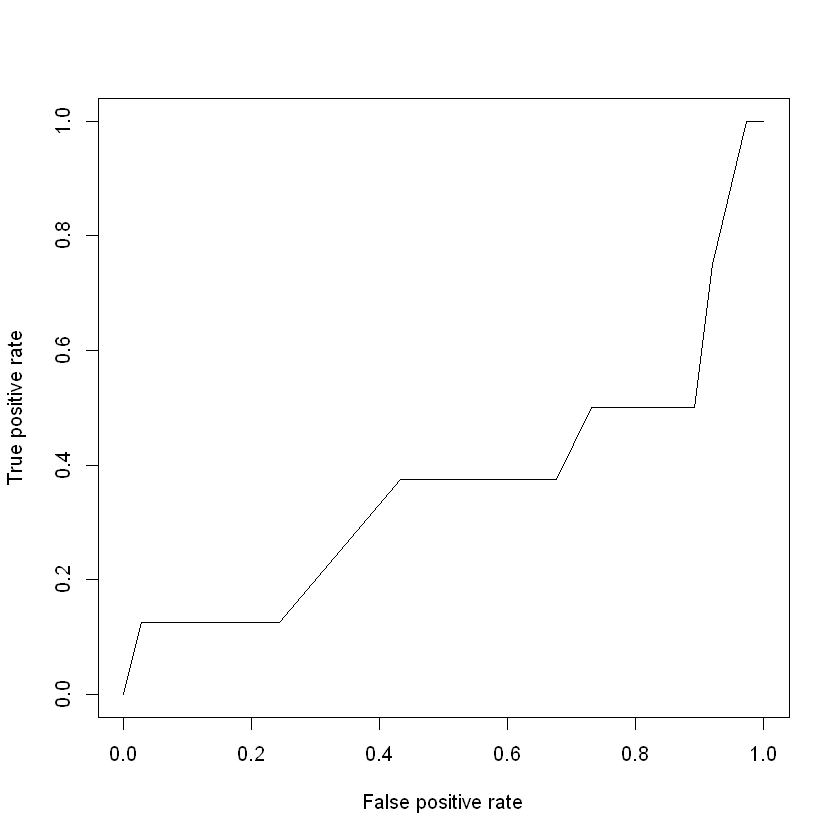

In [40]:
model <- glm(d3_4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1415  -0.8299  -0.6958   1.3309   2.0381  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.6170     0.9669  -0.638    0.523
definitionharmony   0.3228     0.5841   0.553    0.580
needharmony         0.4488     0.5295   0.847    0.397
purposecosmetic     0.1513     0.5746   0.263    0.792
purposeetc         -0.1272     0.5376  -0.237    0.813
interest           -0.2398     0.2319  -1.034    0.301

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 124.40  on 105  degrees of freedom
Residual deviance: 120.37  on 100  degrees of freedom
AIC: 132.37

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,105,124.3999,NA
definition,1,1.7842626,104,122.6156,0.1816268
need,1,0.6959704,103,121.9197,0.4041410
purpose,2,0.4690447,101,121.4506,0.7909486
interest,1,1.0788598,100,120.3718,0.2989528


[1] 0.3828571

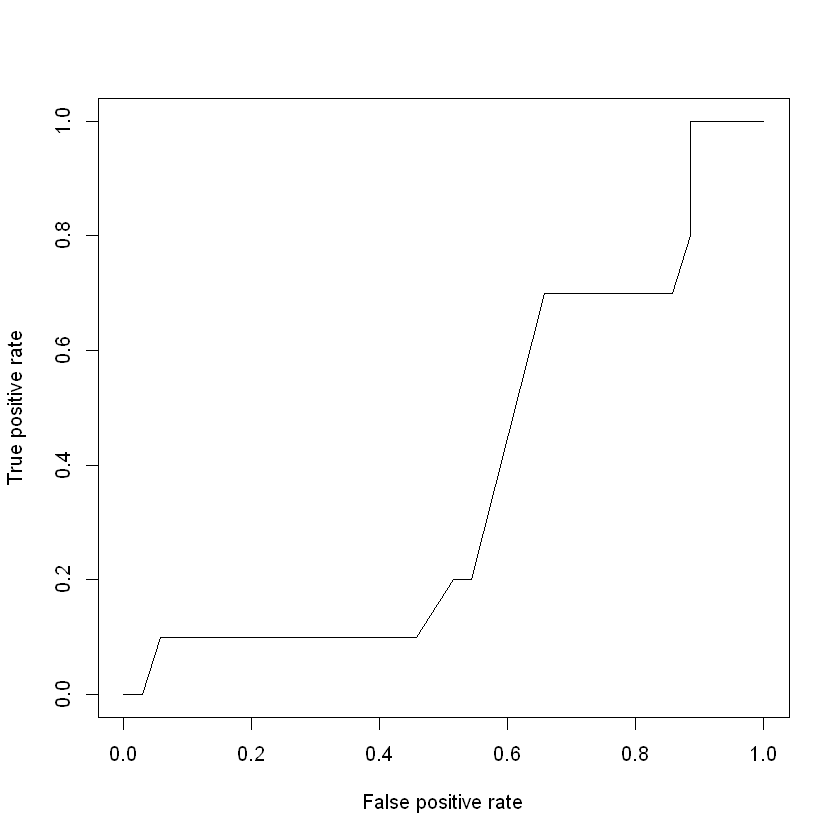

In [41]:
model <- glm(d3_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc